# LDA

Prints top 20 clusters and their 5 keywords. Also prints the probability of each tweet belonging to each category. 

In [197]:
import tweepy
import got3 as got
import pandas as pd
import csv
from nltk.tokenize import RegexpTokenizer
from stop_words import get_stop_words
from nltk.stem.porter import PorterStemmer
from sklearn.feature_extraction import text 
from gensim import corpora, models
import gensim
import warnings
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.decomposition import NMF, LatentDirichletAllocation
from sklearn.feature_extraction import text
warnings.filterwarnings('ignore')

consumer_key = '3FJT3EvtOssiHYfw2xpH4Q9dR'
consumer_secret = 'OzV47fYGizND0NJlaVYyg0ieoiwmCTHeCi9eMMAKVqCxC9QatT'

access_token = '4879319992-CcCKl9DKwrsZIUItxOeUAA7GgfH5Md8XkyaKYx9'
access_token_secret = 'Rva5W0Ttx1FDRBZW6rtUJT1GRQOjqehOWnFFBKElWrdD5'

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)

tweets = pd.read_csv("output_got.csv", sep=None, error_bad_lines=False, warn_bad_lines=False)

texts = tweets['Text'].tolist() 


#Words to ignore
stop_words = text.ENGLISH_STOP_WORDS.union(frozenset(['http','https', 'don', 'gl','www','twitter', 
                                                      'got','bit','women', 'woman', 'like', 'thank', 'instagram', 'fb', 'ly', 
                                                      'goo', 'status', 'atus', 'st', 'tatus','repost', 'did', 'sta', 'tus', 'youtu', 
                                                      'com', 'pic','statu', 'facebook', 'youtube', 'li', 'll', '01', '2017', 
                                                      'make', 'let', 'need', '31', 'rt', 'ln']))
def display_topics(model, feature_names, no_top_words):
    for topic_idx, topic in enumerate(model.components_):
        print ("Topic %d:" % (topic_idx))
        print (" ".join([feature_names[i]
                        for i in topic.argsort()[:-no_top_words - 1:-1]]))
    

def LDA(documents,max_features=100, max_df=0.95, no_topics=20, no_top_words=5):
    
    '''
     tf_vectorizer:
       - Strips out “stop words”
       - Filters out terms that occur in more than 95% of the docs (max_df=0.95)
       - Filters out terms that occur in only one document (min_df=2).
       - Selects the 1,000 most frequently occuring words in the corpus.
       - Normalizes the vector (L2 norm of 1.0) to normalize the effect of 
         document length on the tf_vectorizer values. 
    '''
    tf_vectorizer = CountVectorizer(max_df=max_df, min_df=3, max_features=1000, stop_words=stop_words)
    tf = tf_vectorizer.fit_transform(documents)
    tf_feature_names = tf_vectorizer.get_feature_names()
    
    lda = LatentDirichletAllocation(n_topics=no_topics, max_iter=20, learning_method='online', learning_offset=50.,random_state=0).fit(tf)

    display_topics(lda, tf_feature_names, no_top_words)
    print (lda.transform(tf))
    
LDA(texts)    

Topic 0:
time history senators send heard
Topic 1:
trump scotus change tiffanyatrump un_women
Topic 2:
refugeeswelcome aren supposed leave nomuslimban
Topic 3:
new cover york devos aca
Topic 4:
2018 thehill devos tsunami thanks
Topic 5:
people maga love free marchforlife
Topic 6:
dumptrump democrats muslimban female fgm
Topic 7:
way speak days 10 sure
Topic 8:
whyimarch lovetrumpshate mniwiconi notmypresident donaldtrump
Topic 9:
movement stay zendaya wordpress icantkeepquiet
Topic 10:
rights just man good rape
Topic 11:
photo womensmarchlondon vagina black paper
Topic 12:
feminism news marching feminist resistance
Topic 13:
standuptotrump ow sharia law march
Topic 14:
resistance watch indivisible resist etsy
Topic 15:
stat inauguration day proud urbanebox
Topic 16:
resist theresistance muslimban nobannowall aclu
Topic 17:
right usa oh hollywood womensmarchonwashington
Topic 18:
stupid tcot trumptrain mr_pinko described
Topic 19:
march womens protest read washington
[[ 0.92083333  0.00

# Cleaning Locations

In [74]:
from sklearn.feature_extraction import DictVectorizer
import numpy as np
from sklearn.cluster import KMeans
import sklearn.metrics as metrics
from sklearn.metrics import silhouette_score
from matplotlib import pyplot as plt
import pandas as pd
import warnings
import math
warnings.filterwarnings('ignore')


tweets = pd.read_csv("output_got.csv", sep=None, error_bad_lines=False, warn_bad_lines=False)
state_coords = pd.read_csv("statecoordinates.csv", sep=None, error_bad_lines=False, warn_bad_lines=False)

#lower = lambda x: x.lower()
state_coords['State'] = state_coords['State']

#convert dataframe to dictionary
state_coords = state_coords.set_index('State').T.to_dict()
abbr = {"AL": {'Latitude': 32.806671000000001, 'Longitude': -86.79113000000001},"AK":{'Latitude': 61.370716000000002, 'Longitude': -152.40441899999999}, 
 "AZ": {'Latitude': 33.729759000000001, 'Longitude': -111.43122099999999},"AR":{'Latitude': 34.969704, 'Longitude': -92.373122999999993}, 
 "CA": {'Latitude': 36.116203000000006, 'Longitude': -119.68156399999999},"CO":{'Latitude': 39.059810999999996, 'Longitude': -105.311104}, 
 "CT": {'Latitude': 41.597782000000002, 'Longitude': -72.755370999999997},"DC":{'Latitude': 38.897438000000001, 'Longitude': -77.026817000000008}, 
 "DE": {'Latitude': 39.318522999999999, 'Longitude': -75.507141000000004},"FL": {'Latitude': 27.766278999999997, 'Longitude': -81.686782999999991},
 "GA": {'Latitude': 33.040619, 'Longitude': -83.643073999999999},"HI": {'Latitude': 21.094317999999998, 'Longitude': -157.49833700000002}, 
 "ID": {'Latitude': 39.849426000000001, 'Longitude': -86.258278000000004},"IL":{'Latitude': 40.349457000000001, 'Longitude': -88.986136999999999}, 
 "IN": {'Latitude': 39.849426000000001, 'Longitude': -86.258278000000004},"IA":{'Latitude': 42.011538999999999, 'Longitude': -93.210526000000002},
 "KS": {'Latitude': 38.526600000000002, 'Longitude': -96.726485999999994},"KY":{'Latitude': 37.668140000000001, 'Longitude': -84.670067000000003},
 "LA": {'Latitude': 31.169546, 'Longitude': -91.867805000000004},"ME":{'Latitude': 44.693946999999994, 'Longitude': -69.381927000000005}, 
 "MD": {'Latitude': 39.063946000000001, 'Longitude': -76.802101000000008},"MA":{'Latitude': 42.230170999999999, 'Longitude': -71.530106000000004},
 "MI": {'Latitude': 43.326617999999996, 'Longitude': -84.536094999999989},"MN":{'Latitude': 45.694454, 'Longitude': -93.900192000000004},
 "MS": {'Latitude': 32.741646000000003, 'Longitude': -89.678696000000002},"MO":{'Latitude': 38.456084999999995, 'Longitude': -92.288368000000006},
 "MT": {'Latitude': 46.921925000000002, 'Longitude': -110.454353},"NE":{'Latitude': 41.125370000000004, 'Longitude': -98.268081999999993},
 "NV": {'Latitude': 38.313515000000002, 'Longitude': -117.055374},"NH":{'Latitude': 43.452491999999999, 'Longitude': -71.563896},
 "NJ": {'Latitude': 40.298904, 'Longitude': -74.521011000000001},"NM":{'Latitude': 34.840515000000003, 'Longitude': -106.24848200000001},
 "NY": {'Latitude': 42.165725999999999, 'Longitude': -74.948051000000007},"NC":{'Latitude': 35.630065999999999, 'Longitude': -79.806418999999991},
 "ND": {'Latitude': 47.528911999999998, 'Longitude': -99.784012000000004},"OH":{'Latitude': 40.388783000000004, 'Longitude': -82.764915000000002},
 "OK": {'Latitude': 35.565342000000001, 'Longitude': -96.928916999999998},"OR":{'Latitude': 44.572020999999999, 'Longitude': -122.07093799999998},
 "PA": {'Latitude': 40.590752000000002, 'Longitude': -77.209755000000001},"RI":{'Latitude': 41.680892999999998, 'Longitude': -71.511780000000002},
 "SC": {'Latitude': 33.856891999999995, 'Longitude': -80.94500699999999},"SD":{'Latitude': 44.299782, 'Longitude': -99.438828000000001},
 "TN": {'Latitude': 35.747844999999998, 'Longitude': -86.692344999999989},"TX":{'Latitude': 31.054486999999998, 'Longitude': -97.563461000000004},
 "UT": {'Latitude': 40.150032000000003, 'Longitude': -111.86243400000001}, "VT":{'Latitude': 44.045876, 'Longitude': -72.710685999999995},
 "VA": {'Latitude': 37.769337, 'Longitude': -78.169968000000011},"WA":{'Latitude': 47.400902000000002, 'Longitude': -121.490494},
 "WV": {'Latitude': 38.491225999999997, 'Longitude': -80.954453000000001},"WI":{'Latitude': 44.268543000000001, 'Longitude': -89.616507999999996},
 "WY": {'Latitude': 42.755966000000001, 'Longitude': -107.30248999999999}}

state_coords.update(abbr)
state_names = list(state_coords.keys())



locations = tweets['Geo'].tolist()
cleaned_locations = []

#Number of tweets from each coordinate
coord_counts = {}

#print (locations[:500])

for location in locations:
    
    found_state = False
    if type(location) is str: #make sure its not nan
        for state in state_names:
            if state in location:
                coords = (state_coords[state]['Latitude'], state_coords[state]['Longitude'])
                found_state = True
                if coords in coord_counts:
                    coord_counts[coords] += 1
                else:
                    coord_counts[coords] = 1
                    
                break
    if not found_state: #tweet does not have a state name in it
        coords = 'None'
    cleaned_locations.append(coords)

    
name_counts = {}

# Get dict with {state: number of tweets}
for tup in list(state_counts.keys()):
    for key in state_coords:
        if tup == (state_coords[key]['Latitude'], state_coords[key]['Longitude']):
            name_counts[key] = state_counts[tup]
            break
            
print (len(name_counts) == len(coor)
            
        
            

df = pd.DataFrame({"Location": cleaned_locations})

tweets = pd.concat([tweets, df], axis=1)

del tweets['Geo']

    
        


{'Mississippi': 1, 'Colorado': 5, 'Arizona': 3, 'New York': 37, 'Washington': 20, 'California': 57, 'Texas': 33, 'Virginia': 5, 'North Carolina': 13, 'Oregon': 9, 'Louisiana': 3, 'Florida': 28, 'Maine': 2, 'Oklahoma': 1, 'Ohio': 4, 'Michigan': 7, 'Wisconsin': 3, 'Massachusetts': 8, 'Illinois': 16, 'New Hampshire': 2, 'Pennsylvania': 9, 'New Jersey': 10, 'South Carolina': 2, 'Kentucky': 6, 'Iowa': 3, 'Utah': 1, 'New Mexico': 4, 'Indiana': 1, 'Maryland': 3, 'Kansas': 3, 'Arkansas': 3, 'Connecticut': 6, 'Nevada': 2, 'Alabama': 3, 'Georgia': 6, 'Idaho': 4, 'Rhode Island': 1, 'Tennessee': 5, 'Montana': 1, 'District of Columbia': 4, 'North Dakota': 1, 'South Dakota': 1, 'Minnesota': 4, 'Wyoming': 1, 'Vermont': 1, 'Missouri': 3}


# K-means

Clustering hashtags. Still in beta 

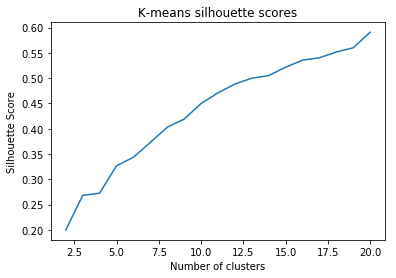

Kmeans top term per cluster:
{'#dumptrump', '#democrats', '#whyimarch', '#muslimban', '#resisttrumptuesday', '#scotus', '#stopsessions', '#impeachtrump', '#womensmarchlondon', '#maga', '#nobannowall', '#notmypresident', '#allmanreport', '#resist', '#indivisible', '#lovetrumpshate', '#standuptotrump', '#trump'}



In [204]:
from collections import Counter
from sklearn.feature_extraction import DictVectorizer
import numpy as np
from sklearn.cluster import KMeans
import sklearn.metrics as metrics
from sklearn.metrics import silhouette_score
from matplotlib import pyplot as plt

#tweets = pd.read_csv("output_got.csv", sep=None, error_bad_lines=False, warn_bad_lines=False)

hashtags = tweets['Hashtags'].tolist()

# ignore hashtags that are redundant or don't particularly mean anything
blacklist = ["#womensmarch", "#", "#theresistance", "#theresistence", "#resistance", "#women"]
new_hashtags = []
for string in hashtags:
    string = string.lower()
    lst = string.split()
    for h in lst:
        if h not in blacklist:
            new_hashtags.append(h)
hashtags = new_hashtags

hashtags_ct = Counter(hashtags)
top_hashtags= [x[0] for x in hashtags_ct.most_common(20)]
#print (top_hashtags)

tweets = tweets.to_dict('records')

# only keep tweets with top hashtags
# create dictionary with format {tweet id: {location, [top_hashtags]} }
tweets_with_top_hashtags = []

for t in tweets:
    t['Hashtags'] = t['Hashtags'].lower().split()
    t['Hashtags'] = [h for h in t['Hashtags'] if h in top_hashtags]
    if len (t['Hashtags']) > 0:
        tweets_with_top_hashtags.append(t)
        


#prepare for vectorization
for t in tweets_with_top_hashtags:
    for h in t['Hashtags']:
        t[h] = True
    del t['Hashtags']
    del t['Username']
    del t['Text']
    del t['Date']
    del t['Geo'] #deleting location for now since it isn't cleaned
    

#make vectors with location and hashtags
vectorizer = DictVectorizer()
X = vectorizer.fit_transform(tweets_with_top_hashtags).toarray()


#if we use longitude and latitude, we would scale them here

#Evaluate number clusters for kmeans via silhouette score
max_clusters = 20

def sc_evaluate_clusters(X,max_clusters):
    s = np.zeros(max_clusters+1)
    s[0] = 0;
    s[1] = 0;
    for k in range(2,max_clusters+1):
        kmeans = KMeans(init='k-means++', n_clusters=k, n_init=10)
        kmeans.fit_predict(X)
        s[k] = metrics.silhouette_score(X,kmeans.labels_,metric='euclidean')
    plt.plot(range(2,len(s)),s[2:])
    plt.xlabel('Number of clusters')
    plt.ylabel('Silhouette Score')
    plt.title("K-means silhouette scores")
    plt.show()
    
sc_evaluate_clusters(X,max_clusters)

k=15
kmeans = KMeans(n_clusters=k, init='k-means++', max_iter=100, n_init=1)
kmeans.fit_predict(X)
k_time = time.time() - start_time

# kmeans top terms per cluster 
asc_order_centroids = kmeans.cluster_centers_.argsort()#[:, ::-1]
order_centroids = asc_order_centroids[:,::-1]
terms = vectorizer.get_feature_names()

#cluster label is most popular term in each cluster
print("Kmeans top term per cluster:")
k_clusters = set()
for i in range(k):
    for ind in order_centroids[i, :2]:
        k_clusters.add(terms[ind])
print(k_clusters)
print()
    



# Web Scraping

With the data from https://statusofwomendata.org, we hope to determine if there's any correlation between a state's ranking in different women's issues and the number of #WomensMarch tweets were sent from that state. 

The outputted data can be found in state_rankings.csv

In [124]:
from bs4 import BeautifulSoup
from pandas import DataFrame as dataF
import requests
import time

url = "https://statusofwomendata.org/state-data/"
headers = {"User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/62.0.3202.94 Safari/537.36"}
stateNames = []
employmentEarn = []
politicalPart = []
povertyOpp = []
reprodRights = []
healthWell = []
workFam = []

page = requests.get(url, headers=headers)
time.sleep(0.5)
soup = BeautifulSoup(page.text, "lxml")
statesList = soup.find("article", class_="post").find_all("p")

for state in statesList:
    statePage = requests.get(state.find("a").get("href"), headers=headers)
    time.sleep(0.5)
    stateSoup = BeautifulSoup(statePage.text, "lxml")
    name = stateSoup.find("div", class_="state").find("h1").text
    stateNames.append(name)
    
    reportCard = stateSoup.find("div", class_="cardSummary").find_all("tr")[1:]
    employmentEarn.append(reportCard[0].find_all("td")[1].text)
    if(reportCard[1].find_all("td")[1].text == "-"):
        politicalPart.append("0")
    else:
        politicalPart.append(reportCard[1].find_all("td")[1].text)
    povertyOpp.append(reportCard[2].find_all("td")[1].text)
    reprodRights.append(reportCard[3].find_all("td")[1].text)
    healthWell.append(reportCard[4].find_all("td")[1].text)
    workFam.append(reportCard[5].find_all("td")[1].text)
        
stateRankings = dataF({"name": stateNames, "Employment & Earnings": employmentEarn, "Political Participation": politicalPart, "Poverty & Opportunity": povertyOpp, "Reproductive Rights": reprodRights, "Health & Well-Being": healthWell, "Work & Family": workFam})
stateRankings.to_csv("state_rankings.csv")